<a href="https://colab.research.google.com/github/ZULYGARZONVILLALBA/GUIA-2/blob/main/Gu%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files

# Subir archivo desde tu PC
archivo_subido = files.upload()

Saving accidents-1.csv to accidents-1.csv


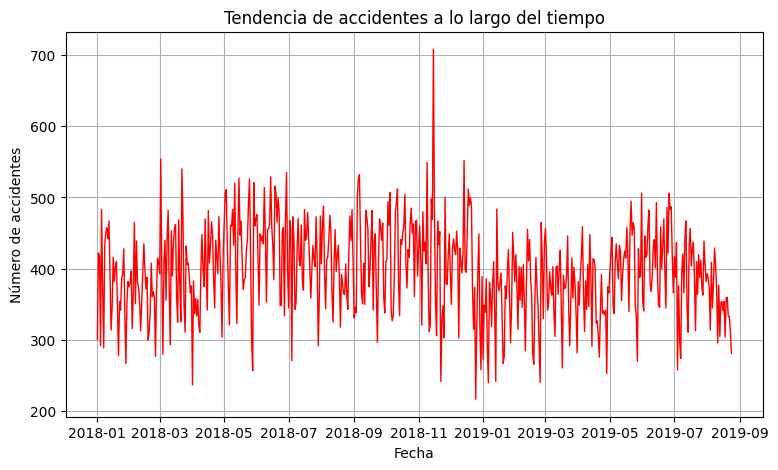

In [5]:
# Leer el archivo CSV
filename = list(archivo_subido.keys())[0]
df = pd.read_csv(filename, delimiter=';', parse_dates=['DATE'])

# Convertir la columna TIME a formato de hora
df['HOUR'] = pd.to_datetime(df['TIME'], format='%I:%M %p', errors='coerce').dt.hour

# 1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
accidents_per_day = df.groupby("DATE").size()
plt.figure(figsize=(9, 5))
plt.plot(accidents_per_day.index, accidents_per_day.values, color="red", linewidth=1)
plt.xlabel("Fecha")
plt.ylabel("Número de accidentes")
plt.title("Tendencia de accidentes a lo largo del tiempo")
plt.grid(True)
plt.show()

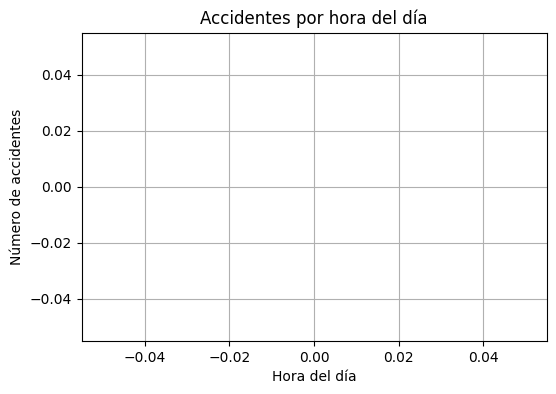

In [ ]:
# 2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
accidents_per_hour = df.groupby("HOUR").size()
plt.figure(figsize=(6, 4))
plt.bar(accidents_per_hour.index, accidents_per_hour.values, color="blue")
plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes")
plt.title("Accidentes por hora del día")
plt.grid(True)
plt.show()

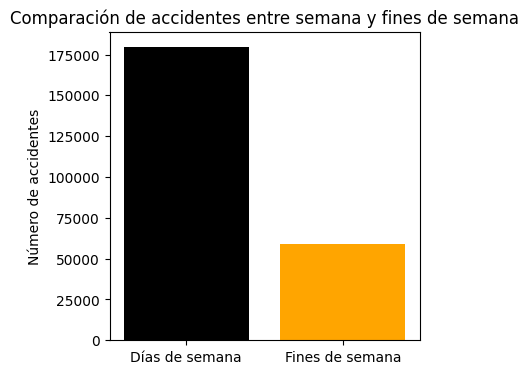

In [ ]:
# 3. ¿Hay más accidentes entre semana que durante los fines de semana?
df['WEEKDAY'] = df['DATE'].dt.dayofweek
weekdays = df[df['WEEKDAY'] < 5].shape[0]
weekends = df[df['WEEKDAY'] >= 5].shape[0]
plt.figure(figsize=(4, 4))
plt.bar(["Días de semana", "Fines de semana"], [weekdays, weekends], color=["black", "orange"])
plt.ylabel("Número de accidentes")
plt.title("Comparación de accidentes entre semana y fines de semana")
plt.show()


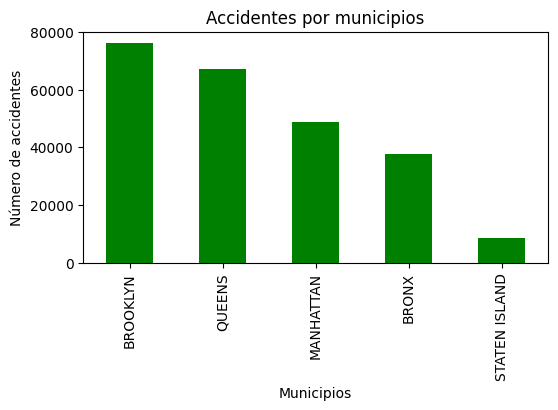

In [ ]:
# 4. ¿Cuál es la proporción de recuento de accidentes por área por municipio?
district_counts = df['BOROUGH'].value_counts()
plt.figure(figsize=(6, 3))
district_counts.plot(kind='bar', color='green')
plt.xlabel("Municipios")
plt.ylabel("Número de accidentes")
plt.title("Accidentes por municipios")
plt.show()


In [ ]:
# 5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
# Eliminar filas con valores nulos en BOROUGH y HOUR
df_filtered = df.dropna(subset=['BOROUGH', 'HOUR'])

# Asegurar que la columna HOUR sea numérica
df_filtered['HOUR'] = pd.to_numeric(df_filtered['HOUR'], errors='coerce')

# Agrupar por municipio y hora
borough_hourly = df_filtered.groupby(['BOROUGH', 'HOUR']).size().unstack()

# Verificar que haya datos numéricos antes de graficar
if not borough_hourly.empty:
    borough_hourly = borough_hourly.fillna(0).astype(int)


In [ ]:
# 5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
df_filtered = df.dropna(subset=['BOROUGH', 'HOUR'])
df_filtered['HOUR'] = pd.to_numeric(df_filtered['HOUR'], errors='coerce')
borough_hourly = df_filtered.groupby(['BOROUGH', 'HOUR']).size().unstack()

if not borough_hourly.empty:
    borough_hourly = borough_hourly.fillna(0).astype(int)
    plt.figure(figsize=(12, 6))
    borough_hourly.T.plot(figsize=(12, 6), colormap='tab10')
    plt.xlabel("Hora del día")
    plt.ylabel("Número de accidentes")
    plt.title("Accidentes por hora en cada municipio")
    plt.legend(title='Municipio')
    plt.grid(True)
    plt.show()
else:
    print("No hay datos suficientes para generar la gráfica de accidentes por hora en cada municipio.")

No hay datos suficientes para generar la gráfica de accidentes por hora en cada municipio.


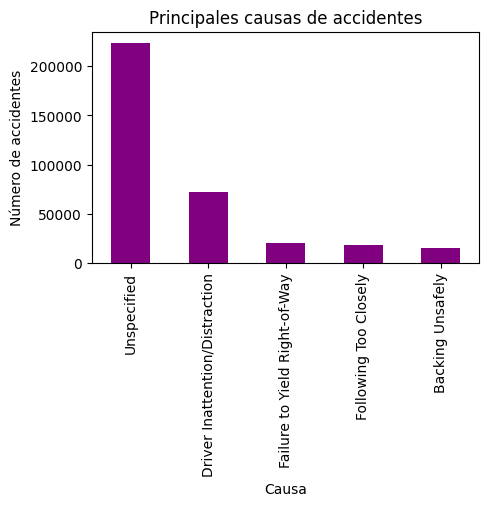

In [ ]:
# 6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
top_causes = df[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']].melt(value_name="FACTOR")
filtered_causes = top_causes[top_causes["FACTOR"].notna()]
top_causes_counts = filtered_causes["FACTOR"].value_counts().head(5)
plt.figure(figsize=(5, 3))
top_causes_counts.plot(kind='bar', color='purple')
plt.xlabel("Causa")
plt.ylabel("Número de accidentes")
plt.title("Principales causas de accidentes")
plt.show()

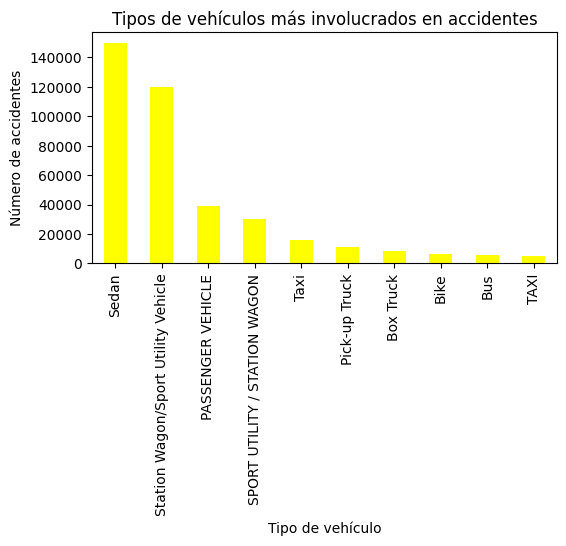

In [ ]:
# 7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
vehicle_counts = df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']].melt(value_name="VEHICLE").groupby("VEHICLE").size()
vehicle_counts = vehicle_counts.drop("Unknown", errors="ignore").sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 3))
vehicle_counts.plot(kind='bar', color='yellow')
plt.xlabel("Tipo de vehículo")
plt.ylabel("Número de accidentes")
plt.title("Tipos de vehículos más involucrados en accidentes")
plt.show()

In [ ]:
# 8. ¿Qué tipos de vehículos están más involucrados en las muertes?
if 'NUMBER OF MOTORISTS DEATHS' in df.columns:
    fatal_vehicles = df[df['NUMBER OF MOTORISTS DEATHS'] > 0][['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']]
    fatal_vehicles = fatal_vehicles.melt(value_name="VEHICLE").dropna()
    fatal_vehicles_counts = fatal_vehicles["VEHICLE"].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    fatal_vehicles_counts.plot(kind='bar', color='black')
    plt.xlabel("Tipo de vehículo")
    plt.ylabel("Número de accidentes fatales")
    plt.title("Vehículos más involucrados en accidentes fatales")
    plt.show()
else:
    print("La columna 'NUMBER OF MOTORISTS DEATHS' no se encuentra en los datos.")


La columna 'NUMBER OF MOTORISTS DEATHS' no se encuentra en los datos.


Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [ ] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [ ] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [ ] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Subir archivo desde tu PC
archivo_subido = files.upload()

Saving accidents-1.csv to accidents-1.csv


Columnas presentes en el DataFrame:
Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

Valores nulos por columna:
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTIN

<ipython-input-90-da46a742935c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ZIP CODE'].fillna(df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)
<ipython-input-90-da46a742935c>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

Ejemplo de valores en la columna TIME:
0    12:12
1    16:30
2    19:30
3    13:10
4    22:40
Name: TIME, dtype: object


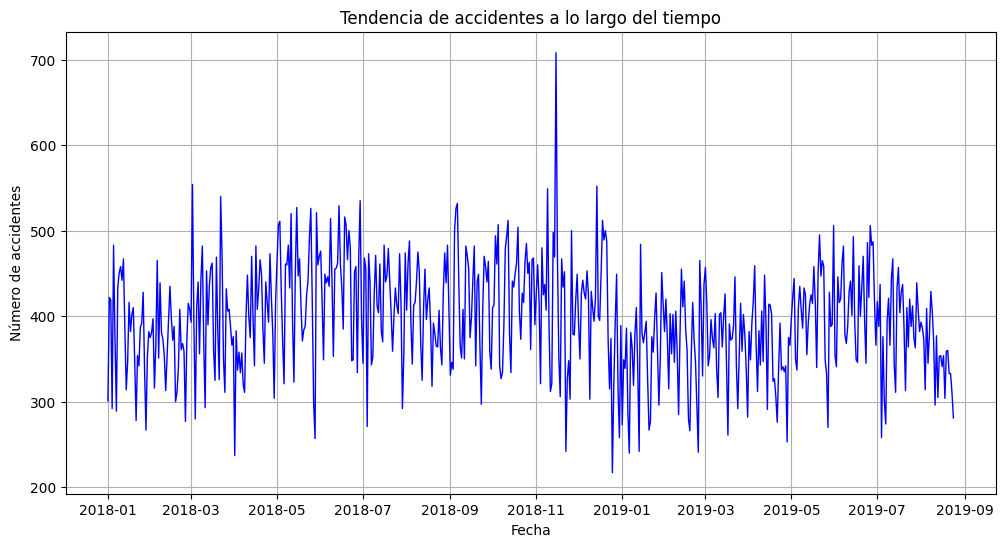

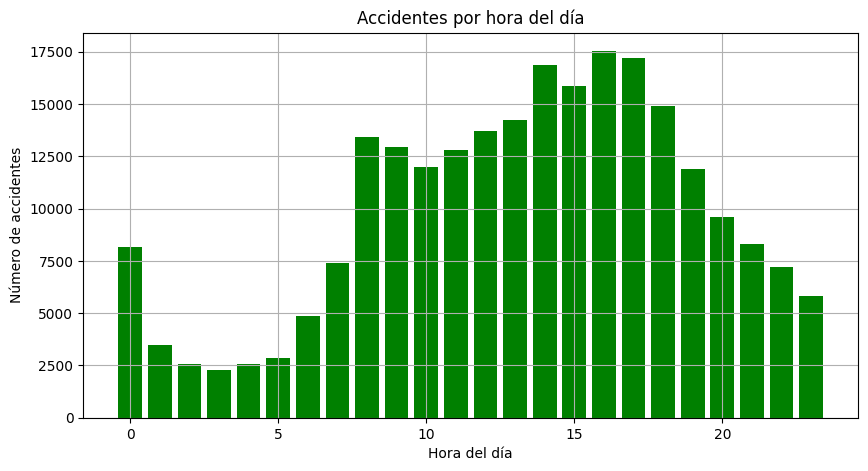

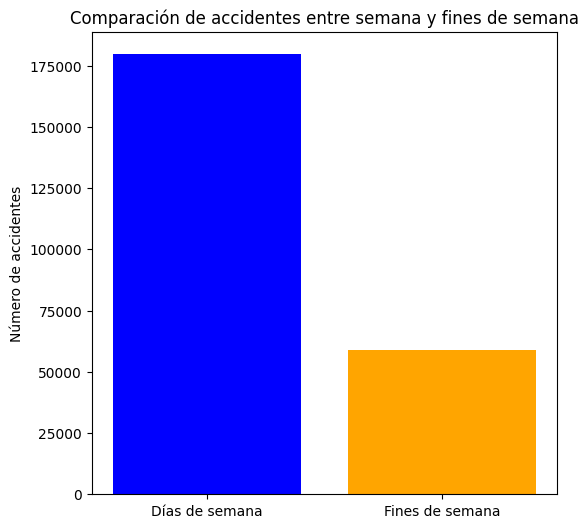

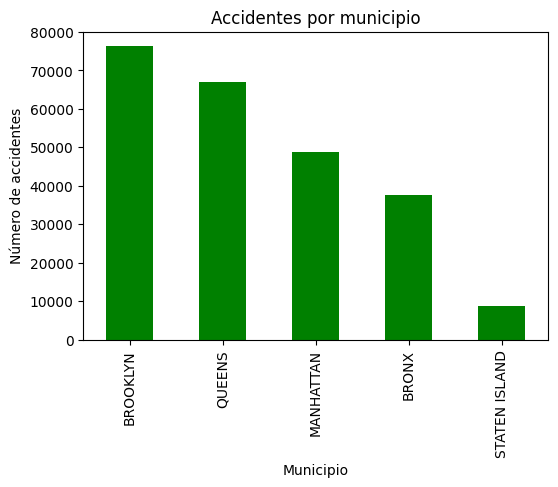

<Figure size 1000x500 with 0 Axes>

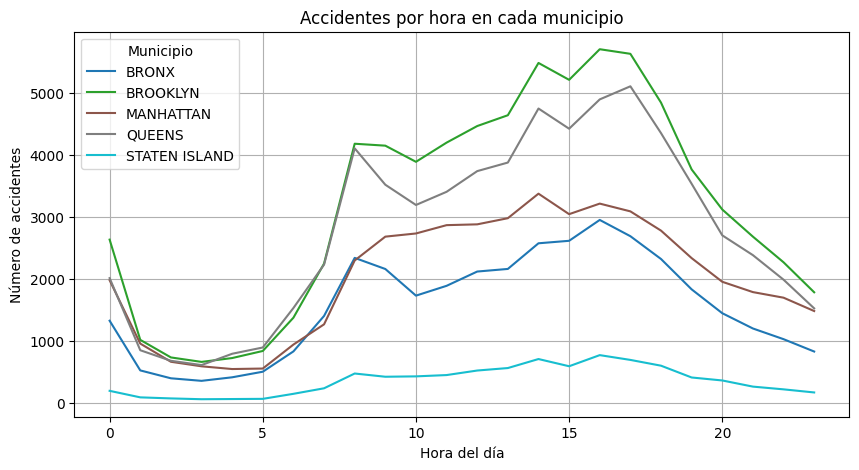

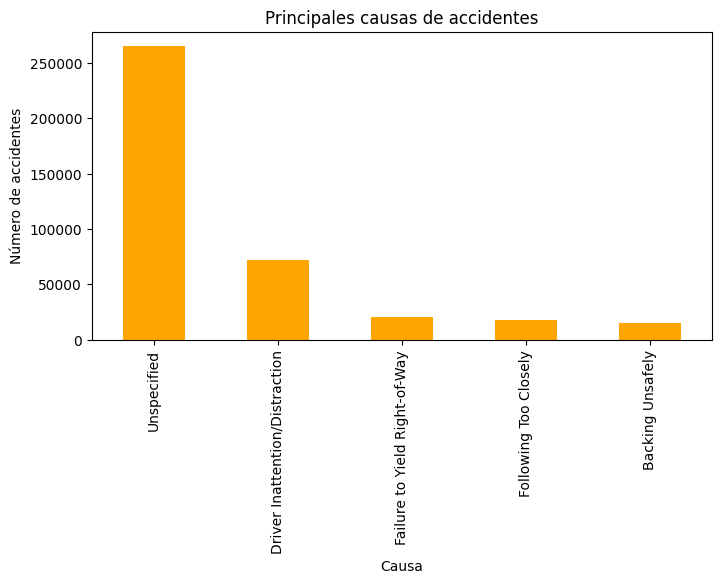

In [ ]:
# Leer el archivo CSV
filename = list(archivo_subido.keys())[0]
df = pd.read_csv(filename, delimiter=';', parse_dates=['DATE'])

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Mostrar las columnas del DataFrame
print("Columnas presentes en el DataFrame:")
print(df.columns)

# Identificar valores nulos
total_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(total_nulos[total_nulos > 0])

# Imputación de valores faltantes
df['ZIP CODE'].fillna(df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)
df['LATITUDE'].fillna(df.groupby('BOROUGH')['LATITUDE'].transform('mean'), inplace=True)
df['LONGITUDE'].fillna(df.groupby('BOROUGH')['LONGITUDE'].transform('mean'), inplace=True)
df['ON STREET NAME'].fillna('UNKNOWN', inplace=True)
for i in range(1, 6):
    factor_col = f'CONTRIBUTING FACTOR VEHICLE {i}'
    vehicle_col = f'VEHICLE TYPE CODE {i}'
    if factor_col in df.columns:
        df[factor_col].fillna('Unspecified', inplace=True)
    if vehicle_col in df.columns:
        df[vehicle_col].fillna('Unknown', inplace=True)

# Verificar formato de la columna TIME
print("Ejemplo de valores en la columna TIME:")
print(df['TIME'].head())

# Intentar convertir la columna TIME a formato de hora con múltiples formatos
formats = ['%I:%M %p', '%H:%M', '%H:%M:%S']
for fmt in formats:
    try:
        df['HOUR'] = pd.to_datetime(df['TIME'], format=fmt, errors='coerce').dt.hour
        if df['HOUR'].notna().sum() > 0:
            break
    except Exception as e:
        print(f"Error con formato {fmt}: {e}")

# Eliminar valores nulos en HOUR
df = df.dropna(subset=['HOUR'])

# 1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
accidents_per_day = df.groupby("DATE").size()
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_day.index, accidents_per_day.values, color="blue", linewidth=1)
plt.xlabel("Fecha")
plt.ylabel("Número de accidentes")
plt.title("Tendencia de accidentes a lo largo del tiempo")
plt.grid(True)
plt.show()

# 2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
accidents_per_hour = df.groupby("HOUR").size()
plt.figure(figsize=(10, 5))
plt.bar(accidents_per_hour.index, accidents_per_hour.values, color="green")
plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes")
plt.title("Accidentes por hora del día")
plt.grid(True)
plt.show()

# 3. ¿Hay más accidentes entre semana que durante los fines de semana?
df['WEEKDAY'] = df['DATE'].dt.dayofweek
weekdays = df[df['WEEKDAY'] < 5].shape[0]
weekends = df[df['WEEKDAY'] >= 5].shape[0]
plt.figure(figsize=(6, 6))
plt.bar(["Días de semana", "Fines de semana"], [weekdays, weekends], color=["blue", "orange"])
plt.ylabel("Número de accidentes")
plt.title("Comparación de accidentes entre semana y fines de semana")
plt.show()

# 4. ¿Cuál es la proporción de recuento de accidentes por área por municipio?
district_counts = df['BOROUGH'].value_counts()
plt.figure(figsize=(6, 4))
district_counts.plot(kind='bar', color='green')
plt.xlabel("Municipio")
plt.ylabel("Número de accidentes")
plt.title("Accidentes por municipio")
plt.show()

# 5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
df_filtered = df.dropna(subset=['BOROUGH', 'HOUR'])
df_filtered['HOUR'] = pd.to_numeric(df_filtered['HOUR'], errors='coerce')
borough_hourly = df_filtered.groupby(['BOROUGH', 'HOUR']).size().unstack()

if not borough_hourly.empty:
    borough_hourly = borough_hourly.fillna(0).astype(int)
    plt.figure(figsize=(10, 5))
    borough_hourly.T.plot(figsize=(10, 5), colormap='tab10')
    plt.xlabel("Hora del día")
    plt.ylabel("Número de accidentes")
    plt.title("Accidentes por hora en cada municipio")
    plt.legend(title='Municipio')
    plt.grid(True)
    plt.show()
else:
    print("No hay datos suficientes para generar la gráfica de accidentes por hora en cada municipio.")

# 6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
top_causes = df[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']].melt(value_name="FACTOR")
filtered_causes = top_causes[top_causes["FACTOR"].notna()]
top_causes_counts = filtered_causes["FACTOR"].value_counts().head(5)
plt.figure(figsize=(8, 4))
top_causes_counts.plot(kind='bar', color='orange')
plt.xlabel("Causa")
plt.ylabel("Número de accidentes")
plt.title("Principales causas de accidentes")
plt.show()


### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

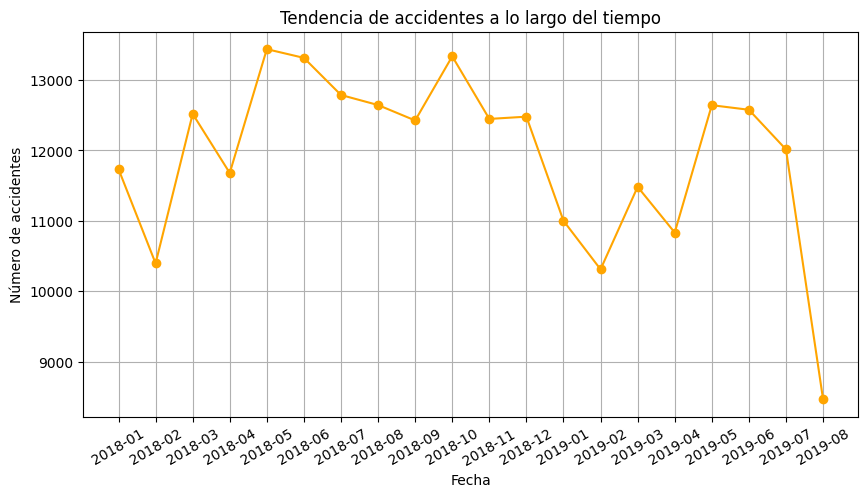

Meses con menor número de accidentes:
YEAR_MONTH
2019-08     8466
2019-02    10310
2018-02    10395
Freq: M, dtype: int64


In [ ]:
# Agrupar los datos por mes y contar la cantidad de accidentes
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')
accidents_per_month = df.groupby('YEAR_MONTH').size()

# Graficar la tendencia de accidentes
plt.figure(figsize=(10, 5))
plt.plot(accidents_per_month.index.astype(str), accidents_per_month.values, marker='o', linestyle='-', color='orange')
plt.xlabel("Fecha")
plt.ylabel("Número de accidentes")
plt.title("Tendencia de accidentes a lo largo del tiempo")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

# Identificar los meses con el menor número de accidentes
min_accidents_months = accidents_per_month.nsmallest(3)  # Obtener los 3 meses con menos accidentes
print("Meses con menor número de accidentes:")
print(min_accidents_months)

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

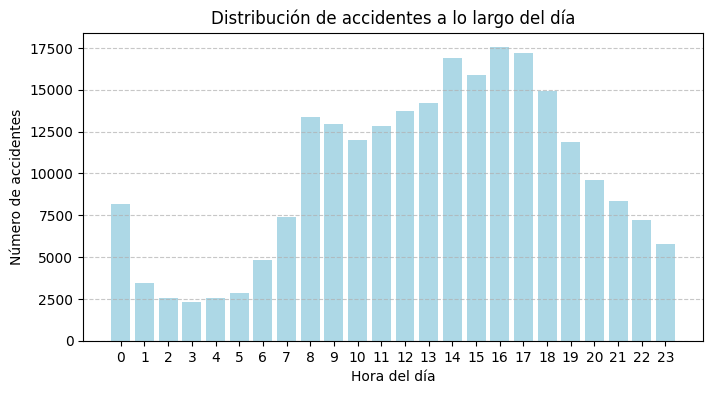

In [ ]:
# Convertir la columna TIME a formato de hora
df['HOUR'] = pd.to_datetime(df['TIME'], format='%H:%M', errors='coerce').dt.hour

# Agrupar los accidentes por hora del día
accidents_per_hour = df.groupby('HOUR').size()

# Graficar la distribución de accidentes por hora
plt.figure(figsize=(8, 4))
plt.bar(accidents_per_hour.index, accidents_per_hour.values, color="lightblue")
plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes")
plt.title("Distribución de accidentes a lo largo del día")
plt.xticks(range(24))  # Asegurar que todas las horas aparezcan en el eje X
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Solución propuesta

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

El principal problema de este enfoque es que **ignora el contexto en el que ocurren los accidentes**, lo que puede llevar a conclusiones incompletas o imprecisas. Algunas limitaciones clave son: 1. **Falta de segmentación geográfica**: - No distingue entre diferentes zonas de la ciudad, donde los patrones de tráfico pueden variar significativamente. - Algunas áreas pueden tener mayor flujo vehicular o condiciones específicas que influyen en la siniestralidad. 2. **D

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

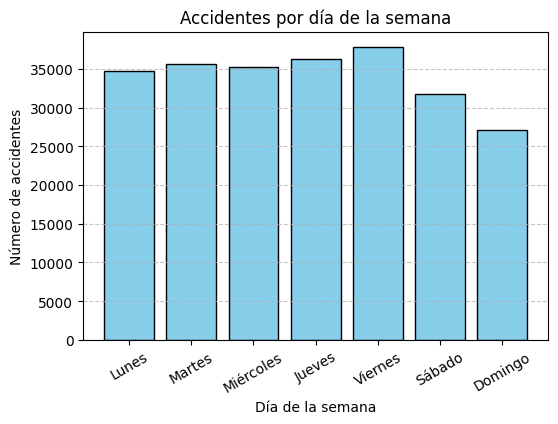

In [ ]:
# Crear una nueva columna con el día de la semana (0 = Lunes, 6 = Domingo)
df['WEEKDAY'] = df['DATE'].dt.weekday

# Contar el número de accidentes por día de la semana
accidents_per_weekday = df['WEEKDAY'].value_counts().sort_index()

# Nombres de los días de la semana
days_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Graficar los datos
plt.figure(figsize=(6,4 ))
plt.bar(days_labels, accidents_per_weekday, color='skyblue', edgecolor='black')
plt.xlabel("Día de la semana")
plt.ylabel("Número de accidentes")
plt.title("Accidentes por día de la semana")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Solución propuesta

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

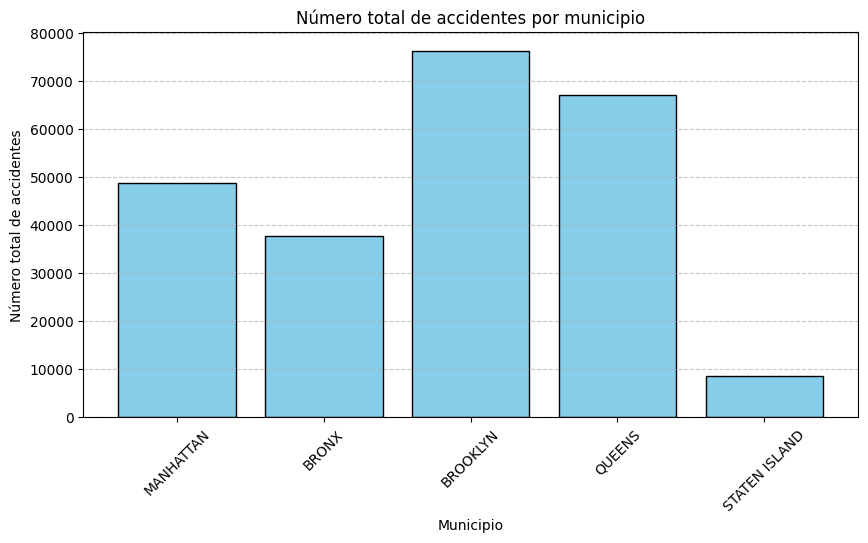

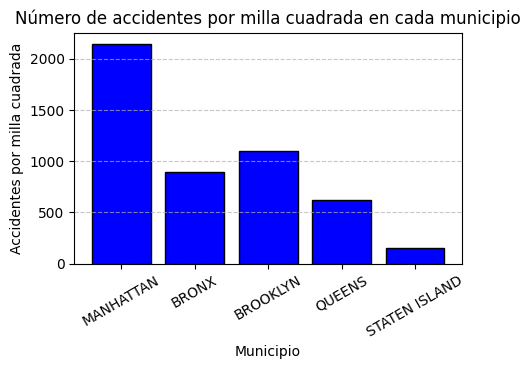

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df ya tiene una columna 'BOROUGH' con los municipios
# Contar el número total de accidentes por municipio
accidents_per_borough = df['BOROUGH'].value_counts()

# Definir el área de cada municipio en millas cuadradas (datos aproximados)
borough_areas = {
    'MANHATTAN': 22.7,
    'BRONX': 42.2,
    'BROOKLYN': 69.4,
    'QUEENS': 108.7,
    'STATEN ISLAND': 58.5
}

# Filtrar solo municipios que estén en el diccionario de áreas
accidents_per_borough = accidents_per_borough[borough_areas.keys()]

# Calcular accidentes por milla cuadrada
accidents_per_mile = accidents_per_borough / pd.Series(borough_areas)

# Gráfico del número total de accidentes por municipio
plt.figure(figsize=(10, 5))
plt.bar(accidents_per_borough.index, accidents_per_borough.values, color='skyblue', edgecolor='black')
plt.xlabel("Municipio")
plt.ylabel("Número total de accidentes")
plt.title("Número total de accidentes por municipio")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de accidentes por milla cuadrada
plt.figure(figsize=(5, 3))
plt.bar(accidents_per_mile.index, accidents_per_mile.values, color='blue', edgecolor='black')
plt.xlabel("Municipio")
plt.ylabel("Accidentes por milla cuadrada")
plt.title("Número de accidentes por milla cuadrada en cada municipio")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Posibles Conclusiones:
📌 Un municipio con más accidentes totales no significa necesariame
📌 *Si un municipio tiene más accidentes por milla cuadrada , su d
📌 **Probablemente ManhattanManhattan probablemente tenga la mayor densidad de accidentes , dado su tamaño r

🚦 ¡Este análisis puede ayudar a priorizar medidas de seguridad en áreas con mayor densidad de accidentes! 🚧

In [ ]:
# Solución propuesta

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

Aunque Brooklyn y Queens tienen un alto número total de accidentes, esto no significa necesariamente que sean las áreas más peligrosas. Para una mejor evaluación, es importante considerar los accidentes por milla cuadrada :

Brooklyn , debido a su alta densmayor cantidad de accidentes por milla cuadrada en
Reinas ,
Manhattan , estafamayor concentración de accidentes por milla cuadrada .
Staten Island , también conocida como
Conclusión:
Si solo observamos los números totales, podríamos pensar que Brooklyn y Queens son las zonas más afectadas. Sin embargo, al calcular los accidentes por milla cuadrada ,Área del mar de Manhattan

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

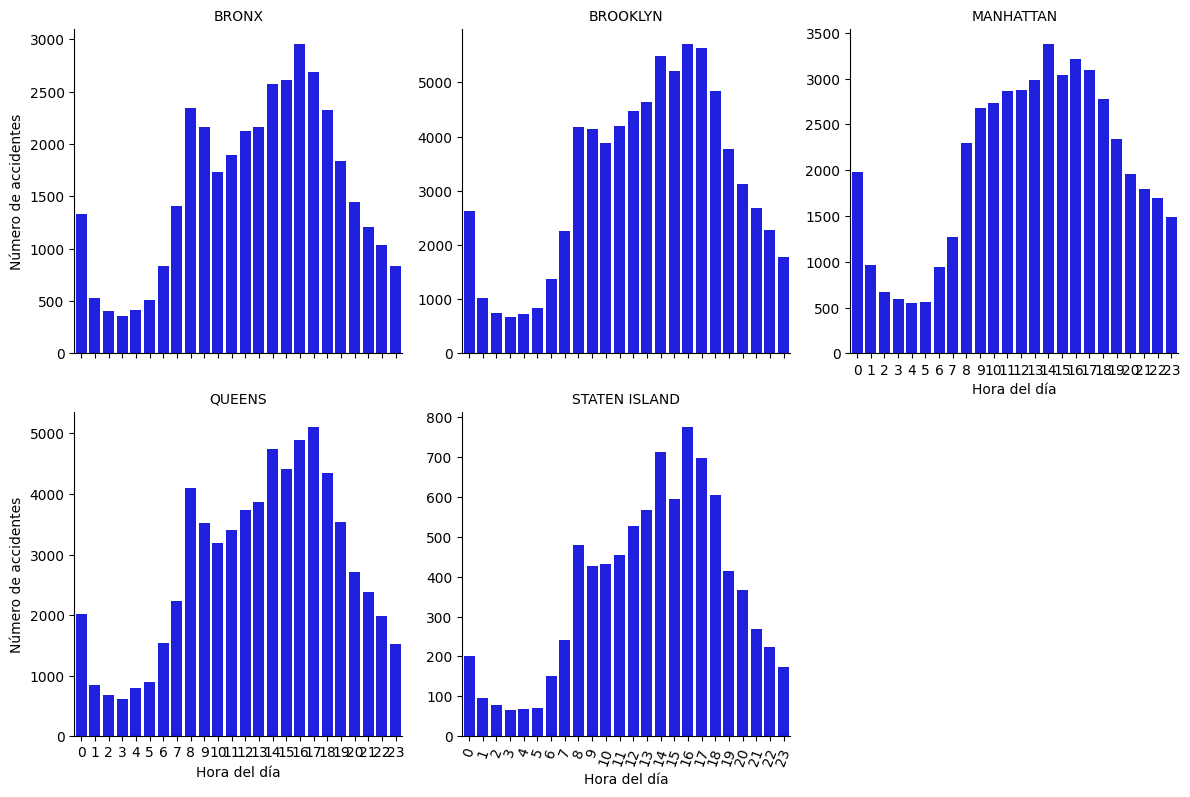

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar accidentes por municipio y hora
df_grouped = df_filtered.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='COUNT')

# Crear el gráfico de barras con FacetGrid
g = sns.FacetGrid(df_grouped, col="BOROUGH", col_wrap=3, sharey=False, height=4)
g.map_dataframe(sns.barplot, x="HOUR", y="COUNT", color="blue")

# Ajustar diseño
g.set_axis_labels("Hora del día", "Número de accidentes")
g.set_titles(col_template="{col_name}")
plt.xticks(rotation=70)

# Mostrar gráfico
plt.show()


**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

📊 Sí, el número de accidentes 🚗💥 varía a lo largo del día según el distrito. Factores como el tráfico 🚦, la densidad poblacional 🏙️ y las actividades comerciales 🏢 afectan los picos de incidentes en cada zona.

🔹 Manhattan 🏙️: Más accidentes durante las horas pico de oficina ⏰🏢.
🔹 Brooklyn y Queens 🏡🚲: Aumentan en las mañanas 🌅 y tar

✅ Conclusión : Sí, debe

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

<ipython-input-126-830103318232>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=factor_counts['Factor'][:10], x=factor_counts['Count'][:10], palette='viridis')


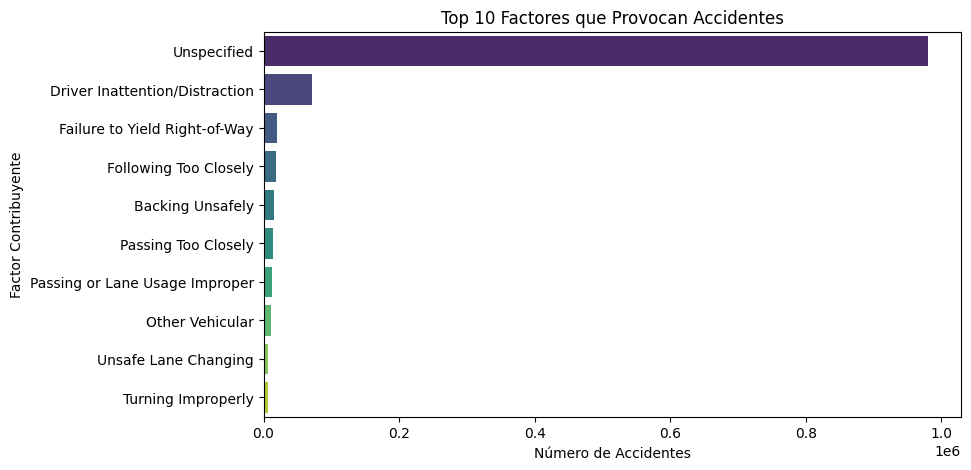

In [ ]:
# ¿Para cada municipio, durante qué horas es más probable que ocurran accidentes?
df_filtered = df.dropna(subset=['BOROUGH', 'HOUR'])
df_filtered['HOUR'] = pd.to_numeric(df_filtered['HOUR'], errors='coerce')

# Obtener factores contribuyentes en una sola columna
factor_columns = [f'CONTRIBUTING FACTOR VEHICLE {i}' for i in range(1, 6) if f'CONTRIBUTING FACTOR VEHICLE {i}' in df.columns]
factors = pd.concat([df[col] for col in factor_columns], axis=0).reset_index(drop=True)

# Contar ocurrencias de cada factor
factor_counts = factors.value_counts().reset_index()
factor_counts.columns = ['Factor', 'Count']

# Graficar los 10 factores más comunes
plt.figure(figsize=(9, 5))
sns.barplot(y=factor_counts['Factor'][:10], x=factor_counts['Count'][:10], palette='viridis')
plt.xlabel("Número de Accidentes")
plt.ylabel("Factor Contribuyente")
plt.title("Top 10 Factores que Provocan Accidentes")
plt.show()


In [ ]:
# Solución propuesta

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

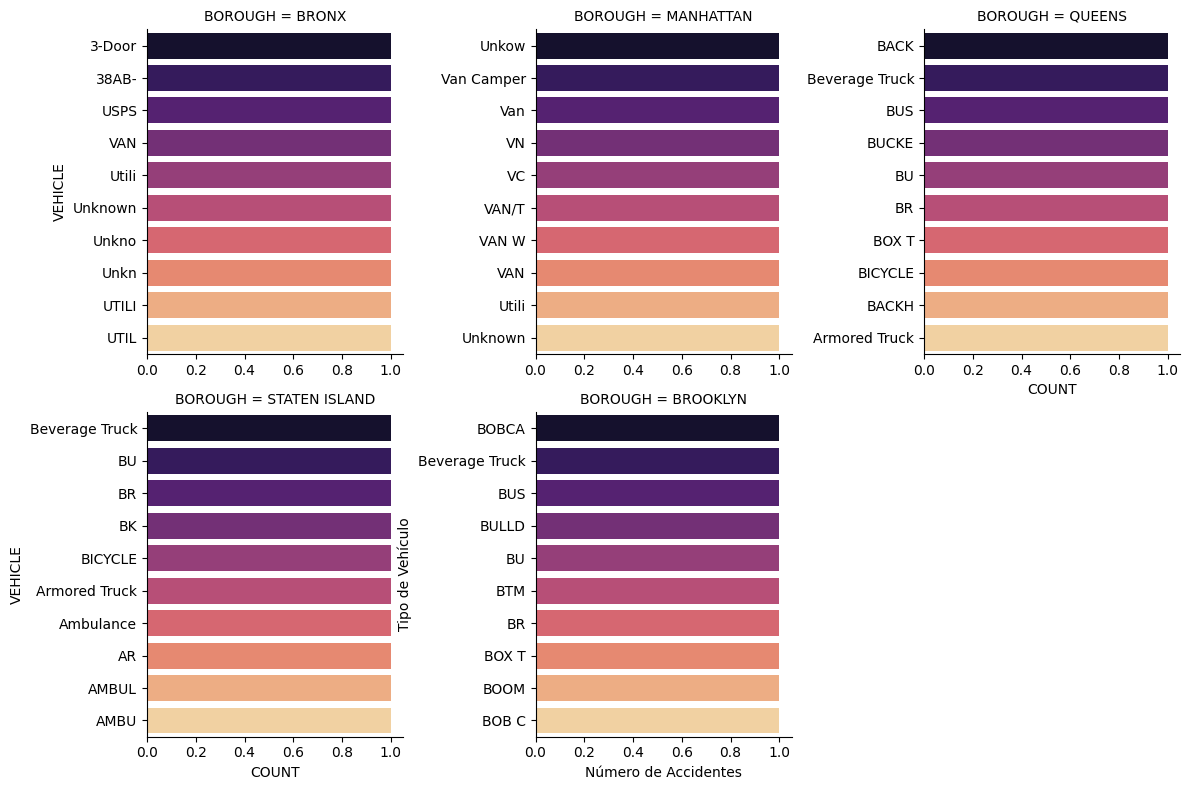

In [ ]:
# Ejercicio 8: Tipos de vehículos involucrados en accidentes por municipio
vehicle_columns = [f'VEHICLE TYPE CODE {i}' for i in range(1, 6) if f'VEHICLE TYPE CODE {i}' in df.columns]
vehicles = pd.concat([df[['BOROUGH', col]].dropna().rename(columns={col: 'VEHICLE'}) for col in vehicle_columns])
vehicles = vehicles.drop_duplicates().reset_index(drop=True)

# Contar ocurrencias de cada tipo de vehículo por municipio
vehicle_counts = vehicles.groupby(['BOROUGH', 'VEHICLE']).size().reset_index(name='COUNT')

# Graficar los 10 tipos de vehículos más comunes por municipio
g = sns.FacetGrid(vehicle_counts.sort_values('COUNT', ascending=False).groupby('BOROUGH').head(10), col='BOROUGH', col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.barplot, x='COUNT', y='VEHICLE', palette='magma')
plt.xlabel("Número de Accidentes")
plt.ylabel("Tipo de Vehículo")
plt.show()



In [ ]:
# Solución propuesta

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

In [ ]:
# Solución propuesta

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.